# FGD1
[Aarskog-Scott syndrome (AAS)](https://www.omim.org/entry/305400) can be caused by mutation in the FGD1 gene.


In [14]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2024-08-13')
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-08-13
Using gpsea version 0.7.1


### FGD1
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for FGD1.

In [15]:
gene_symbol = 'FGD1'
mane_tx_id = 'NM_004463.3'
mane_protein_id = 'NP_004454.2' # FYVE, RhoGEF and PH domain-containing protein 1 [Homo sapiens]

In [16]:
from ppktstore.registry import configure_phenopacket_registry
phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store("0.1.22") as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))
print(f'Loaded {len(phenopackets)} phenopackets')

from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets, load_phenopacket_folder
pdir = "../../../phenopacket-store/notebooks/FGD1/phenopackets"
cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopacket_folder(  
    #phenopackets=phenopackets,
    pp_directory=pdir,
    cohort_creator=cohort_creator,
)
validation.summarize()

Loaded 16 phenopackets
Individuals Processed: 48individuals [00:06,  6.95individuals/s]
Validated under permissive policy
No errors or warnings were found


In [17]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

HPO Term,ID,Seen in n individuals
Short stature,HP:0004322,46
Hypertelorism,HP:0000316,45
Anteverted nares,HP:0000463,38
Shawl scrotum,HP:0000049,36
Long philtrum,HP:0000343,34
Short nose,HP:0003196,32
Ptosis,HP:0000508,31
Cryptorchidism,HP:0000028,28
Brachydactyly,HP:0001156,25
Clinodactyly of the 5th finger,HP:0004209,23


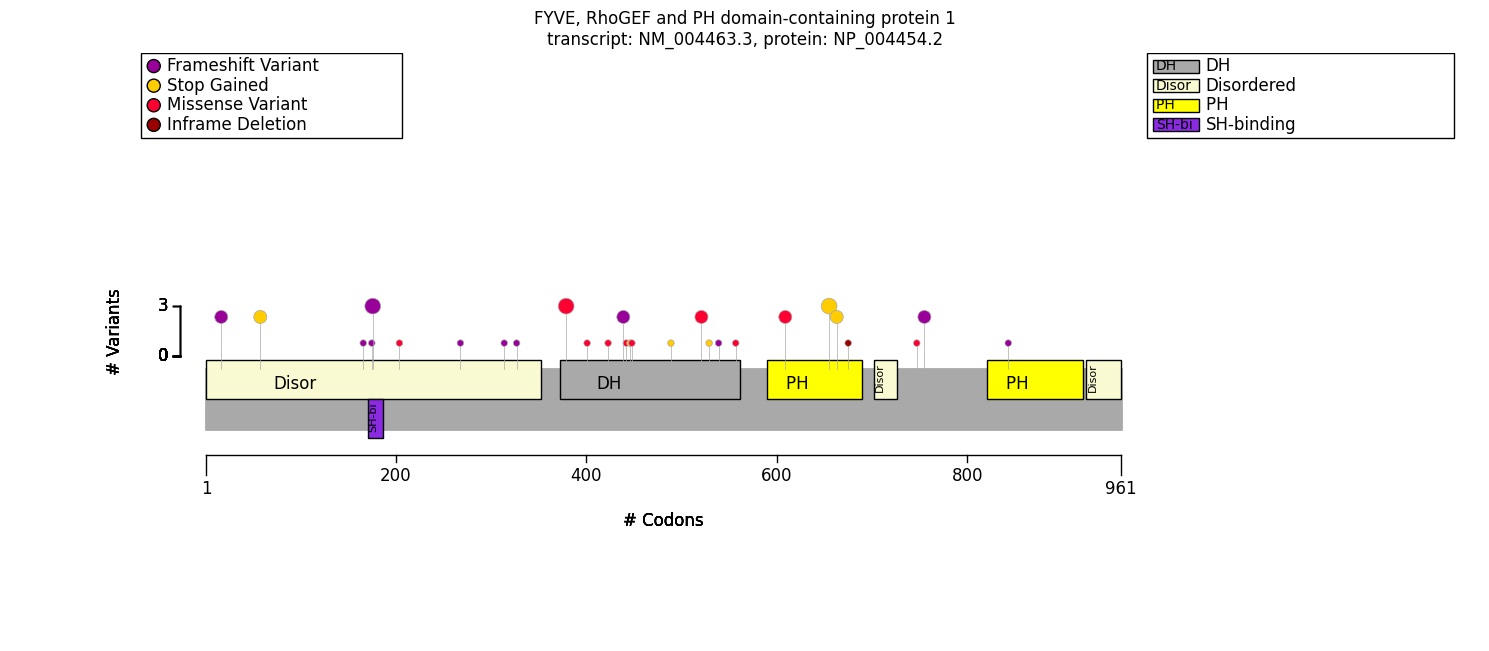

In [18]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)


fgd1_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
fgd1_fig.tight_layout()

In [19]:
from gpsea.view import ProteinVariantViewer
pvv = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
pvv.process(cohort=cohort)

Name,Type,Coordinates,Count,Variants
Disordered,REGION,1 - 353,13,p.Leu177ProfsTer40; p.His328ThrfsTer32; p.Gln59Ter; p.Pro315ArgfsTer11; p.Leu177ThrfsTer40; p.Ala269ValfsTer91; p.Tyr167SerfsTer48; p.Pro18ArgfsTer106; p.Ser205Ile
SH3-binding,MOTIF,171 - 187,4,p.Leu177ProfsTer40; p.Leu177ThrfsTer40
DH,DOMAIN,373 - 561,16,p.Leu440ArgfsTer31; p.Glu380Ala; p.Glu380Ter; p.Arg402Gln; p.Arg522His; p.Tyr530Ter; p.Arg449Cys; p.Ser558Trp; p.Gln490Ter; p.Arg443His; p.Asp540GlufsTer11; p.Trp447Ter; p.Asn424Asp
PH 1,DOMAIN,590 - 689,8,p.Arg656Ter; p.Arg610Leu; p.Gln664Ter; p.Glu676del
Disordered,REGION,702 - 726,0,
PH 2,DOMAIN,821 - 921,1,p.Val844TrpfsTer19
Disordered,REGION,925 - 961,0,


In [20]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest
pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [21]:
from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate
from gpsea.model import VariantEffect
from gpsea.view import MtcStatsViewer

missense = VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)

missense_predicate = monoallelic_predicate(
    a_predicate=missense,
    b_predicate=~missense,
    a_label="Missense",
    b_label="Other"
)

missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=missense_predicate,
    pheno_predicates=pheno_predicates,
)


viewer = MtcStatsViewer()
viewer.process(missense_result)



Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,18
HMF03,Skipping term because of a child term with the same individual counts,22
HMF08,Skipping general term,61
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,121


In [22]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group                                       Missense          Other  \
                                                      Count Percent  Count   
Broad foot [HP:0001769]                                 1/7     14%  14/15   
Cryptorchidism [HP:0000028]                            4/11     36%  24/31   
Umbilical hernia [HP:0001537]                          4/10     40%   2/20   
Ptosis [HP:0000508]                                    7/13     54%  24/31   
Short nose [HP:0003196]                               10/13     77%  22/24   
Shawl scrotum [HP:0000049]                            10/13     77%  26/29   
Downslanted palpebral fissures [HP:0000494]            5/10     50%  15/22   
Short stature [HP:0004322]                            12/13     92%  34/35   
Anteverted nares [HP:0000463]                         10/12     83%  28/31   
Widow's peak [HP:0000349]                              7/11     64%  14/19   
Hypertelorism [HP:0000316]                            13/13    100%  32/34   
Broad palm [HP:0001169]                                 7/7    100%  12/13   
Abnormal palm morphology [HP:0100871]                   9/9    100%  20/20   
Single transverse palmar crease [HP:0000954]            3/5     60%  12/18   
Growth delay [HP:0001510]                             12/12    100%  34/34   
Abnormal nasal morphology [HP:0005105]                10/10    100%  32/32   
Inguinal hernia [HP:0000023]                           6/13     46%  13/29   
Hernia of the abdominal wall [HP:0004299]               7/7    100%  13/13   
Abnormal testis morphology [HP:0000035]                 4/4    100%  24/24   
Abnormal male external genitalia morphology [HP...    11/11    100%  30/30   
Abnormal scrotum morphology [HP:0000045]              10/10    100%  26/26   
High anterior hairline [HP:0009890]                     7/7    100%  14/14   
Abnormality of the forehead [HP:0000290]                9/9    100%  19/19   
Abnormality of the palpebral fissures [HP:0008050]      6/6    100%  15/15   
Abnormal eyelid morphology [HP:0000492]                 7/7    100%  20/20   
Abnormal ocular adnexa morphology [HP:0030669]          7/7    100%  20/20   
Slanting of the palpebral fissure [HP:0200006]          5/5    100%  15/15   
Abnormal external nose morphology [HP:0010938]        10/10    100%  28/28   
Abnormal lip morphology [HP:0000159]                  11/11    100%  30/30   
Abnormal oral cavity morphology [HP:0000163]          11/11    100%  31/31   
Brachydactyly [HP:0001156]                              6/6    100%  19/19   
Abnormal digit morphology [HP:0011297]                11/11    100%  30/30   
Abnormal appendicular skeleton morphology [HP:0...    11/11    100%  33/33   
Clinodactyly of the 5th finger [HP:0004209]             5/6     83%  18/21   
Finger clinodactyly [HP:0040019]                        5/5    100%  18/18   
Deviation of finger [HP:0004097]                        5/5    100%  18/18   
Abnormal finger morphology [HP:0001167]                 5/5    100%  19/19   
Deviation of the 5th finger [HP:0009179]                5/5    100%  18/18   
Abnormal nostril morphology [HP:0005288]              10/10    100%  28/28   
Abnormal morphology of the nasal alae [HP:0000429]    10/10    100%  28/28   
Abnormality of the philtrum [HP:0000288]              11/11    100%  29/29   
Abnormal upper lip morphology [HP:0000177]            11/11    100%  29/29   
Camptodactyly [HP:0012385]                              5/7     71%  16/21   
Flexion contracture of digit [HP:0030044]               5/5    100%  16/16   
Abnormality of joint mobility [HP:0011729]              5/5    100%  20/20   
Frontal bossing [HP:0002007]                            3/6     50%   8/16   
Long philtrum [HP:0000343]                             9/11     82%  25/31   

Allele group                                                                   \
                                                   Percent Corrected p values   
Broad foot [HP:

In [23]:
dh = VariantPredicates.protein_feature(
    feature_id="DH", protein_metadata=protein_meta
)
dh_predicate = monoallelic_predicate(
    a_predicate=dh,
    b_predicate=~dh,
    a_label="DH domain",
    b_label="Other"
)
dh_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=dh_predicate,
    pheno_predicates=pheno_predicates,
)
summarize_hpo_analysis(hpo=hpo, result=dh_result)

Allele group                                       DH domain          Other  \
                                                       Count Percent  Count   
Cryptorchidism [HP:0000028]                             5/13     38%  23/29   
Umbilical hernia [HP:0001537]                           5/12     42%   1/18   
Single transverse palmar crease [HP:0000954]             7/8     88%   8/15   
Clinodactyly of the 5th finger [HP:0004209]              5/7     71%  18/20   
Short nose [HP:0003196]                                11/14     79%  21/23   
Dental malocclusion [HP:0000689]                         1/6     17%   6/14   
Long philtrum [HP:0000343]                             12/13     92%  22/29   
Broad foot [HP:0001769]                                  4/7     57%  11/15   
Frontal bossing [HP:0002007]                             2/6     33%   9/16   
Camptodactyly [HP:0012385]                              7/10     70%  14/18   
Ptosis [HP:0000508]                                    12/16     75%  19/28   
Inguinal hernia [HP:0000023]                            7/14     50%  12/28   
Hypertelorism [HP:0000316]                             15/15    100%  30/32   
Broad palm [HP:0001169]                                  6/6    100%  13/14   
Abnormal palm morphology [HP:0100871]                  10/10    100%  19/19   
Short stature [HP:0004322]                             15/16     94%  31/32   
Growth delay [HP:0001510]                              15/15    100%  31/31   
Abnormal nasal morphology [HP:0005105]                 13/13    100%  29/29   
Hernia of the abdominal wall [HP:0004299]                8/8    100%  12/12   
Abnormal testis morphology [HP:0000035]                  5/5    100%  23/23   
Abnormal male external genitalia morphology [HP...     13/13    100%  28/28   
Shawl scrotum [HP:0000049]                             13/15     87%  23/27   
Abnormal scrotum morphology [HP:0000045]               13/13    100%  23/23   
Widow's peak [HP:0000349]                               8/11     73%  13/19   
High anterior hairline [HP:0009890]                      8/8    100%  13/13   
Abnormality of the forehead [HP:0000290]                 9/9    100%  19/19   
Abnormality of the palpebral fissures [HP:0008050]       7/7    100%  14/14   
Abnormal eyelid morphology [HP:0000492]                11/11    100%  16/16   
Abnormal ocular adnexa morphology [HP:0030669]         11/11    100%  16/16   
Downslanted palpebral fissures [HP:0000494]             6/10     60%  14/22   
Slanting of the palpebral fissure [HP:0200006]           6/6    100%  14/14   
Abnormal external nose morphology [HP:0010938]         12/12    100%  26/26   
Abnormal lip morphology [HP:0000159]                   14/14    100%  27/27   
Abnormal oral cavity morphology [HP:0000163]           15/15    100%  27/27   
Brachydactyly [HP:0001156]                               8/8    100%  17/17   
Abnormal digit morphology [HP:0011297]                 12/12    100%  29/29   
Abnormal appendicular skeleton morphology [HP:0...     14/14    100%  30/30   
Finger clinodactyly [HP:0040019]                         5/5    100%  18/18   
Deviation of finger [HP:0004097]                         5/5    100%  18/18   
Abnormal finger morphology [HP:0001167]                  5/5    100%  19/19   
Deviation of the 5th finger [HP:0009179]                 5/5    100%  18/18   
Anteverted nares [HP:0000463]                          12/14     86%  26/29   
Abnormal nostril morphology [HP:0005288]               12/12    100%  26/26   
Abnormal morphology of the nasal alae [HP:0000429]     12/12    100%  26/26   
Abnormality of the philtrum [HP:0000288]               14/14    100%  26/26   
Abnormal upper lip morphology [HP:0000177]             14/14    100%  26/26   
Flexion contracture of digit [HP:0030044]                7/7    100%  14/14   
Abnormality of joint mobility [HP:0011729]               8/8    100%  17/17   

Allele group                                     

# Summary

In [24]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary


f_results = (
    GPAnalysisResultSummary.from_mono(
        result=missense_result,
    ),
    GPAnalysisResultSummary.from_mono(
        result=dh_result,
    ),
)

caption = "No statistically significant results identified."
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=f_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [25]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [26]:
summarizer.process_latex(report=report, protein_fig=fgd1_fig)

Figure saved to ../../supplement/img/FGD1_protein_diagram-draft.pdf
Output to ../../supplement/tex/FGD1_summary_draft.tex
